In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# Carrega nome das classes que passaram por filtro
itens = []
itens_file = open("classes_filtro",'r')
for p in itens_file.readlines():
    c = p.rstrip("\n")
    if len(c)>1:
        itens +=[c.split("_")]
itens = [['nao eh para aparecer'],['silence']] + itens 

In [8]:
# Carrega nome das classes que passaram por filtro
patterns = []
patterns_file = open("resultados/70_10.txt",'r')
for p in patterns_file.readlines():
    c = p.rstrip("\n")
    if len(c)>1:
        patterns +=[c.split(" ")]

In [99]:
hist = []
ext_patterns = []
for p in patterns:
    sequence_pattern = ""
    last = False
    if p[0] == "1":
        continue
    
    for t in p:
        contagem = 0
        if t == '#SUP:':
            last = True
            sequence_pattern = sequence_pattern[0:-3]
        elif last == True:
            contagem = int(t)
            sequence_pattern = sequence_pattern + t + " " + str((contagem*1.0)/1212)
            hist += [(contagem*1.0)/1212]
        else:
            if int(t) == -1:
                sequence_pattern = sequence_pattern + "-> "
            else:
                sequence_pattern = sequence_pattern + itens[int(t)][0] + " "
    ext_patterns += [[sequence_pattern,contagem]]

In [97]:
ext_patterns.sort(key = lambda a: a[1],reverse=True)

In [104]:
hist.sort(reverse=True)

In [107]:
%matplotlib notebook

<IPython.core.display.Javascript object>


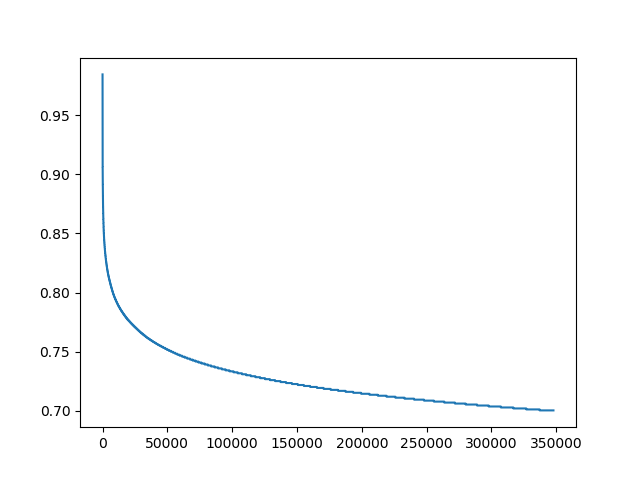

In [108]:
plt.plot(hist)

In [98]:


f = open("resultados/70_10_legivel.txt", "w")
for p in ext_patterns:
    f.write(p[0]+"\n")
f.close()